# The Insight of Stack Overflow 2023 Annual Developer Survey

## The CRISP-DM Process

Cross-Industry Standard Process for Data Mining

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

## Introduction

This dataset is sourced from [Stack Overflow](https://insights.stackoverflow.com/survey). In May 2023, more than 90,000 developers participated in the annual Stack Overflow survey, sharing insights on their learning and development journey, preferred tools, and future aspirations.

## Business Understanding

In this notebook, I want to use the Stack Overflow 2023 dataset to find some insight between Asian Countries and the United States. Since I just started learning to code about half a year ago, I want to know which languages and AI tools are more popular.

There will be three questions I will seek to answer to get this information:

1. What are the top 10 programming languages that developers in Asian countries and the United States of America want to work with next year?

2. What is the difference that the developer wants to use AI-powered search tools next year between Asian countries and the United States?

3. What is the difference in time developers spend in Asia and the United States searching for solutions to work-related problems?

## Data Understanding

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2023_survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

We intend to analyze the `Country`, `LangaugeWantToWorkWith`, `AISearchWantToWorkWith`, and `TimeSearching` columns. While these columns contain missing values (NaN), we are interested in understanding the developer's intent without addressing them. Therefore, we will utilize the existing non-null data to glean insights without attempting to impute missing values.

## Question 1: What are the top 10 programming languages that developers in Asian countries and the United States of America want to work with next year?

### Data Preparation

In [5]:
# Filter the DataFrame to include only rows where the 'Country' column corresponds to the Asian countries I am interested in.
asian_countries = ['India', 'China', 'Japan', 'Philippines', 'Vietnam', 'Thailand', 'South Korea', 'Malaysia', 'Singapore', 'Taiwan', 'Hong Kong']
df_asian = df[df['Country'].isin(asian_countries)]

# Filter the DataFrame to include only rows where the 'Country' column corresponds to USA
df_usa = df[df['Country'] == 'United States of America']

In [6]:
# Count the occurrences of each programming language in the 'LanguageWantToWorkWith' column for the Asian dataset
asian_lan = df_asian['LanguageWantToWorkWith'].value_counts().reset_index()

# Count the occurrences of each programming language in the 'LanguageWantToWorkWith' column for the USA dataset
usa_lan = df_usa['LanguageWantToWorkWith'].value_counts().reset_index()

In [9]:
# Renaming columns in the 'asian_lan' dataframe
asian_lan.rename(columns={'index': 'language', 'LanguageWantToWorkWith': 'count'}, inplace=True)

# Renaming columns in the 'usa_lan' dataframe
usa_lan.rename(columns={'index': 'language', 'LanguageWantToWorkWith': 'count'}, inplace=True)

In [11]:
# Create a language list
language_vals = ["Ada", "Apex", "APL", "Assembly", "Bash/Shell (all shells)", "C", "C#", "C++", "Clojure'", "Cobol", 
                 "Crystal", "Dart", "Delphi", "Elixir", "Erlang", "F#", "Flow", "Fortran", "GDScript", "Go", "Groovy"
                 "Haskell", "HTML/CSS", "Java", "JavaScript", "Julia", "Kotlin", "Lisp", "Lua", "MATLAB", "Nim", "Objective-C",
                 "OCaml", "Perl", "PHP", "PowerShell", "Prolog", "Python", "R", "Raku", "Ruby", "Rust", "SAS", "Scala", "Solidity",
                 "SQL", "Swift", "TypeScript", "VBA", "Visual Basic (.Net)", "Zig"]

In [13]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    # loop through list of ed types
    for val in look_for:
        # loop through rows
        for idx in range(df.shape[0]):
            # if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(list(new_df.items()), columns=[col1, col2])
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [14]:
# Update and sort the Asian language DataFrame based on the count of occurrences
asian_lan = total_count(asian_lan, 'language', 'count', language_vals).reset_index(drop=True)

# Update and sort the USA language DataFrame based on the count of occurrences
usa_lan = total_count(usa_lan, 'language', 'count', language_vals).reset_index(drop=True)

### Modeling

In [17]:
def plot_top_languages(df, n=10, title='', color='skyblue', ax=None):
    '''
    Plots a horizontal bar chart for the top languages based on their count percentage.

    INPUT:
    -----------
    df    : Input DataFrame with columns 'language', 'count', and 'percentage'.
    n     : Number of top languages to plot (default is 10).
    title : Title for the plot.
    color : Color for the bars.
    ax    : Matplotlib axes to plot on.

    OUTPUT:
    -----------
    None Displays a horizontal bar chart.
    '''
    # Calculate the percentage
    df['percentage'] = (df['count'] / df['count'].sum()) * 100
    
    # Sort by count in descending order
    df = df.sort_values(by='count', ascending=False)

    # Select the top n languages and reverse the order
    top_languages = df.head(n).iloc[::-1]

    # Plot the horizontal bar chart
    bars = ax.barh(y=top_languages['language'], width=top_languages['percentage'], color=color)

    # Display value labels on the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.1f}%', ha='left', va='center')

    # Set chart title and labels
    ax.set_title(f'Top {n} Popular Languages in {title}')

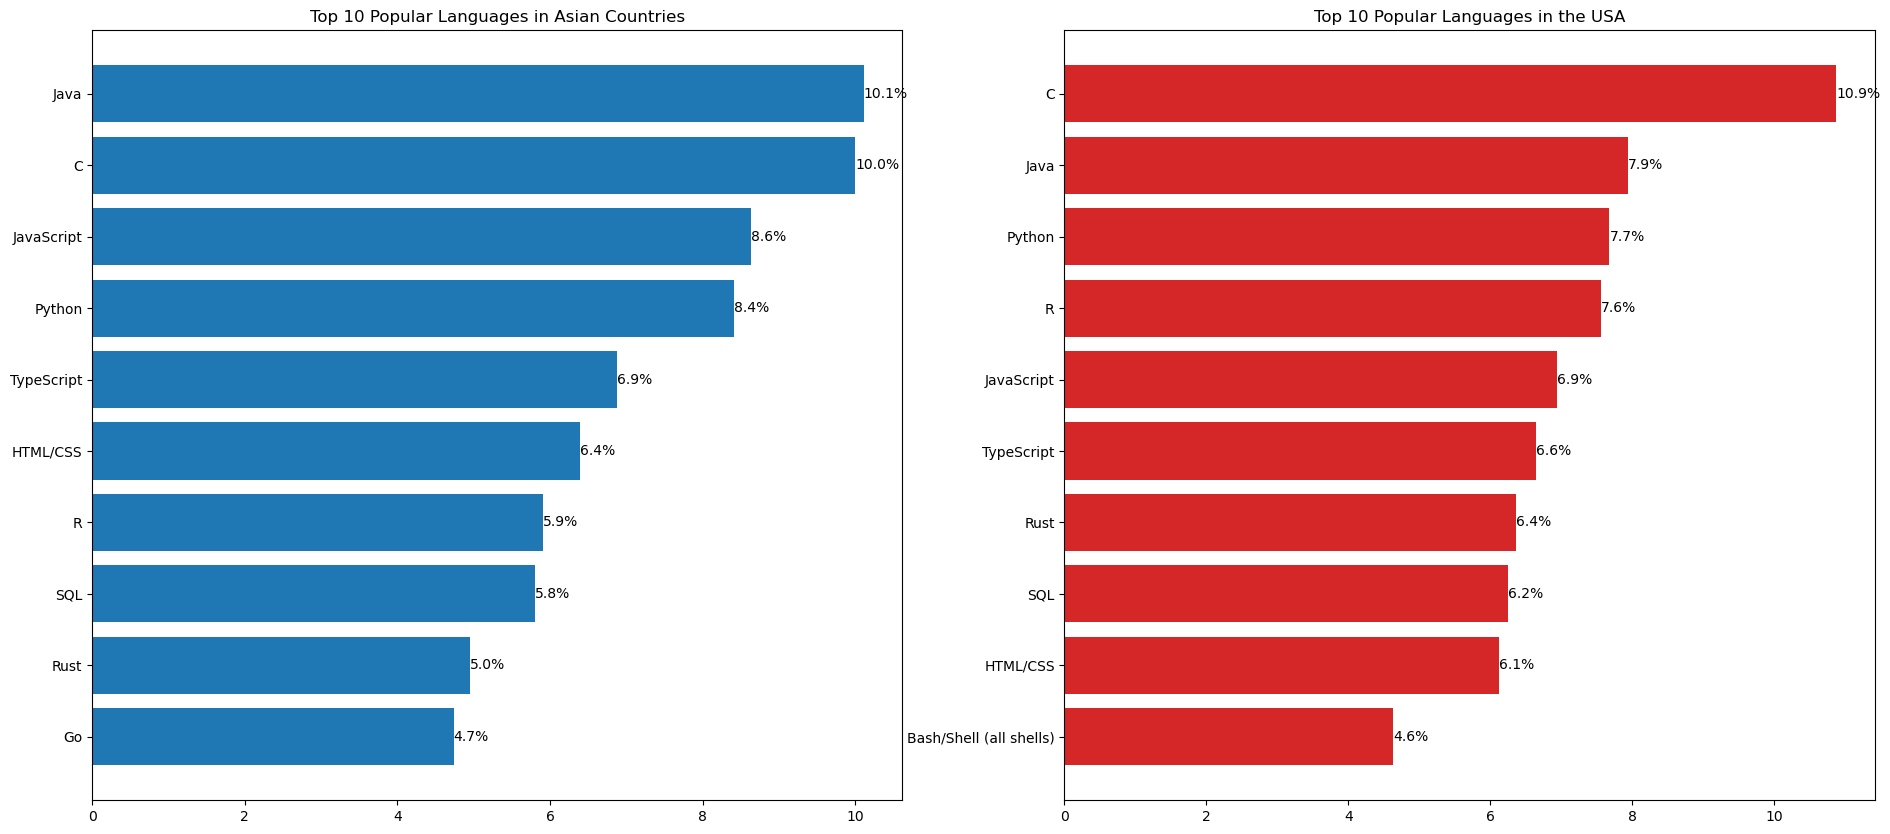

In [23]:
# Create subplots with two axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 10))

# Plot the top languages for 'Asian Countries'
plot_top_languages(asian_lan, title='Asian Countries', color='tab:blue', ax=ax1)

# Plot the top languages for 'the USA'
plot_top_languages(usa_lan, title='the USA', color='tab:red', ax=ax2)

plt.show()

### Evaluation

**Analysis of Programming Language Popularity:**

Our analysis reveals that `Java` and `C` are the most popular programming languages in both Asia and the United States. `Python` also holds significant importance in both regions. However, a key difference emerges when we consider `JavaScript` and `R`: `JavaScript` enjoys greater popularity in Asia, while `R` is more prevalent in the USA.

**Web Development Trends:**

The chart further suggests that web development remains a strong field in Asian countries, while the USA appears to value statistical analysis using R more highly.

## Question 2: What is the difference that the developer wants to use AI-powered search tools next year between Asian countries and the United States?

In [24]:
# Split the 'AISearchWantToWorkWith' column in the Asian dataset into individual languages and count occurrences
asian_ai = df_asian['AISearchWantToWorkWith'].value_counts().reset_index()

# Split the 'AISearchWantToWorkWith' column in the USA dataset into individual languages and count occurrences
usa_ai = df_usa['AISearchWantToWorkWith'].value_counts().reset_index()

In [25]:
# Renaming columns in the 'asian_ai' dataframe
asian_ai.rename(columns={'index': 'tools', 'AISearchWantToWorkWith': 'count'}, inplace=True)

# Renaming columns in the 'usa_ai' dataframe
usa_ai.rename(columns={'index': 'tools', 'AISearchWantToWorkWith': 'count'}, inplace=True)

In [27]:
# Create a tools list
tools_vals = ["Andi", "Bing AI", "ChatGPT", "Google Bard AI", "Metaphor", "Neeva AI", "Perplexity AI", "Phind", 
             "Quora Poe", "WolframAlpha", "You.com"]

In [28]:
# Update and sort the Asian AI tools DataFrame based on the count of occurrences
asian_ai = total_count(asian_ai, 'tools', 'count', tools_vals).reset_index(drop=True)

# Update and sort the USA AI tools DataFrame based on the count of occurrences
usa_ai = total_count(usa_ai, 'tools', 'count', tools_vals).reset_index(drop=True)

In [29]:
def plot_top_tools(df, n=5, title='', color='skyblue', ax=None):
    '''
    Plots a horizontal bar chart for the top AI-powered search tools based on their count percentage.

    Parameters:
    -----------
    df    : Input DataFrame with columns 'tools', 'count', and 'percentage'.
    n     : Number of top tools to plot (default is 5).
    title : Title for the plot.
    color : Color for the bars.
    ax    : Matplotlib axes to plot on.

    Returns:
    -----------
    None Displays a horizontal bar chart.
    '''
    # Calculate the percentage
    df['percentage'] = (df['count'] / df['count'].sum()) * 100
    
    # Sort by count in descending order
    df = df.sort_values(by='count', ascending=False)

    # Select the top tools and reverse the order
    top_tools = df.head(n).iloc[::-1]

    # Plot the horizontal bar chart
    bars = ax.barh(y=top_tools['tools'], width=top_tools['percentage'], color=color)

    # Display value labels on the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.1f}%', ha='left', va='center')

    # Set chart title and labels
    ax.set_title(f'Top {n} AI-powered search tools developers want to work with in {title}')

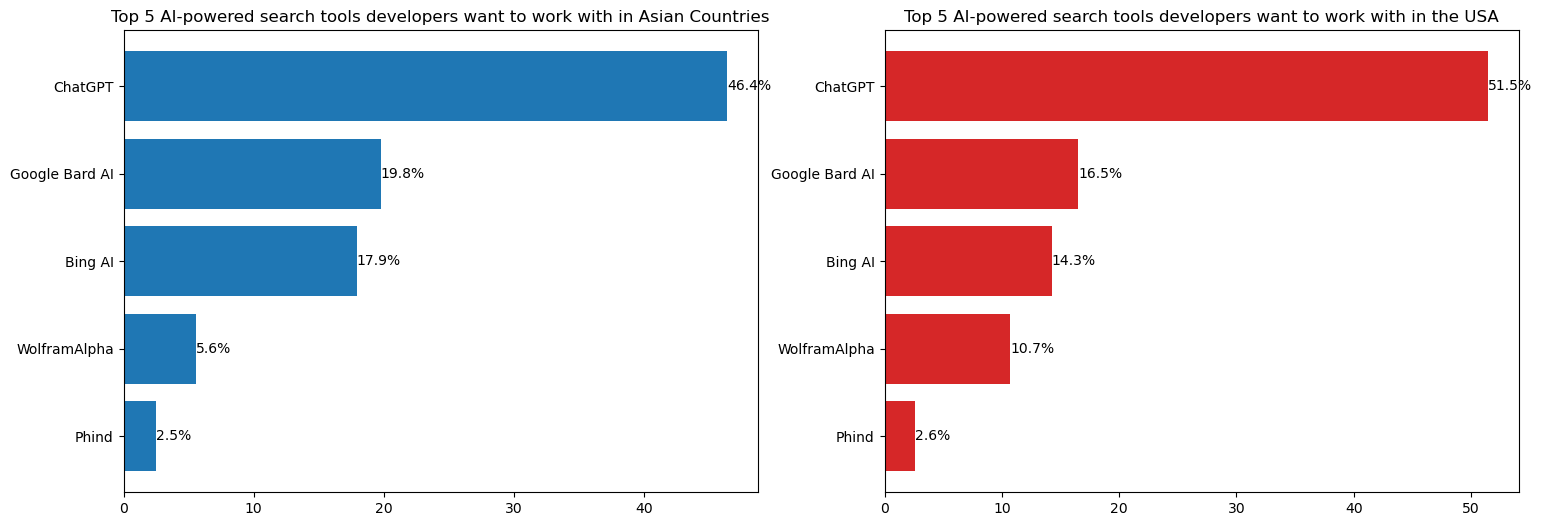

In [30]:
# Create subplots with two axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the top AI-powered search tools for 'Asian Countries'
plot_top_tools(asian_ai, title='Asian Countries', color='tab:blue', ax=ax1)

# Plot the top AI-powered search tools for 'the USA'
plot_top_tools(usa_ai, title='the USA', color='tab:red', ax=ax2)

plt.show()

### Evaluation

**Emerging AI-powered Search Tools:**

The emergence of AI-powered search tools has brought developers many options. Identifying the most powerful tools and those likely to be heavily relied upon in the coming year is of vital interest.

**Regional Preferences in Search Tools:**

Our analysis indicates no significant disparity in overall adoption between Asian countries and the United States. However, we observe subtle regional preferences: Google Bard AI and Bing AI seem more widely favored in Asian countries, while WolframAlpha appears to hold greater sway in the United States.

## 3. What is the difference in time spent by developers in Asia and the United States when searching for solutions to work-related problems?

In [31]:
# Split the 'LanguageWantToWorkWith' column into individual languages
asian_time = df_asian['TimeSearching'].value_counts().reset_index()
usa_time = df_usa['TimeSearching'].value_counts().reset_index()

In [32]:
# Renaming columns in the 'asian_ai' dataframe
asian_time.rename(columns={'index': 'time', 'TimeSearching': 'count'}, inplace=True)

# Renaming columns in the 'usa_ai' dataframe
usa_time.rename(columns={'index': 'time', 'TimeSearching': 'count'}, inplace=True)

In [33]:
def plot_bar(df, title='', color='skyblue', ax=None):
    '''
    Plots a vertical bar chart to show the distribution of time developers spend searching for solutions.

    INPUT:
    -----------
    df : Input DataFrame with columns 'time', 'count', and 'percentage'.
    title : Title for the plot.
    color : Color for the bars.
    ax : Matplotlib axes to plot on.

    OUTPUT:
    -----------
    None Displays a vertical bar chart.
    '''
    # Calculate the percentage
    df['percentage'] = (df['count'] / df['count'].sum()) * 100
    
    # Sort by count in descending order
    df = df.sort_values(by='count', ascending=False)

    # Plot the bar chart
    bars = ax.bar(df['time'], df['percentage'], color=color)

    # Display value labels on the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

    # Set chart title and labels
    ax.set_title(f'How long do developers search for solutions to work-related problems in {title}?')
    ax.set_xlabel('Time')


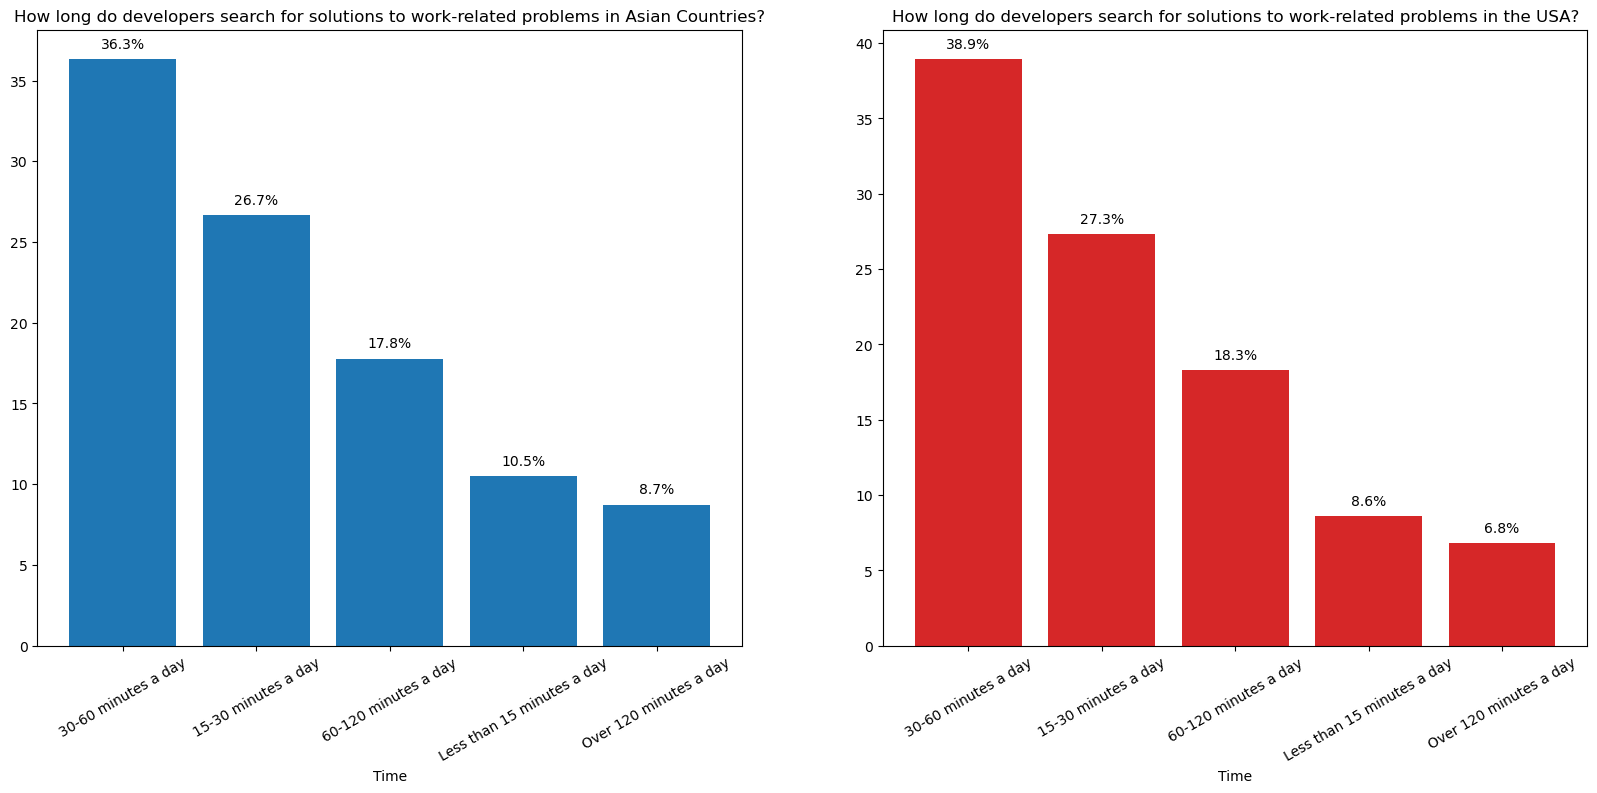

In [35]:
# Create subplots with two axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the distribution of time spent searching for solutions in 'Asian Countries'
plot_bar(asian_time, title='Asian Countries', color='tab:blue', ax=ax1)
ax1.tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability

# Plot the distribution of time spent searching for solutions in 'the USA'
plot_bar(usa_time, title='the USA', color='tab:red', ax=ax2)
ax2.tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability

plt.show()

### Evaluation

**Search for Solutions Time Comparison:**

Our analysis reveals no significant difference in the average time spent searching for solutions between developers in Asian countries and the United States. However, a noteworthy finding is the distribution across different time ranges.

- Asian developers utilize the `Less than 15 minutes a day` and `Over 120 minutes a day` options more frequently than their US counterparts.
- Conversely, developers in the USA tend to spend more time within the `30-60 minutes a day` range compared to Asia.

This observation suggests potential differences in research strategies or problem-solving approaches between the two regions.